# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**


In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Installing conda and rdkit**

In [1]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-04-05 18:12:18--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   171MB/s    in 0.5s    

2023-04-05 18:12:19 (171 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-packa

## **Loading bioactivity data**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,1000000.0,inactive
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,1000000.0,inactive
2,CHEMBL350093,N#CCCN1CC(=O)OC(c2ccc(OCc3ccccc3)cc2)=N1,18.0,active
3,CHEMBL161907,O=c1c(=O)c2ccc(OCCCC(F)(F)F)cc2c1=O,9.0,active
4,CHEMBL17079,N#CCCn1nc(-c2ccc(OCc3ccccc3)cc2)oc1=S,4.4,active
...,...,...,...,...
5155,CHEMBL4284618,C#CCNC(=O)/C=C/c1ccc(O)c(O)c1,50000.0,inactive
5156,CHEMBL5077905,C#CCNC/C=C/c1ccc(O)c(OC)c1,50000.0,inactive
5157,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,29900.0,inactive
5158,CHEMBL92401,CC(C)NNC(=O)c1ccncc1,7500.0,intermediate


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Calculating Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10 

### **Importing libraries**

In [5]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### **Calculating descriptors**

In [6]:
def lipinski(smiles, verbose=False):
  moldata= []
  i=0
  for elem in smiles:
    if(isinstance(elem,str)):
      mol=Chem.MolFromSmiles(elem) 
      moldata.append(mol)
    else:
       df.drop(df.index[i])
    i+=1
        
       
  baseData= np.arange(1,1)
  i=0  
  for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i+=1      
    
  columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
  descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
  return descriptors


In [7]:
df_lipinski = lipinski(df.canonical_smiles)

### **Combining DataFrames**

The 2 dataframes that will be combined:

In [8]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,426.314,4.59450,1.0,4.0
1,305.765,2.91500,1.0,4.0
2,335.363,2.69968,0.0,6.0
3,286.205,1.51730,0.0,4.0
4,337.404,4.36527,0.0,6.0
...,...,...,...,...
5155,217.224,0.86040,3.0,3.0
5156,217.268,1.63680,2.0,3.0
5157,228.247,2.97380,3.0,3.0
5158,179.223,0.72440,2.0,3.0


In [9]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,1000000.0,inactive
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,1000000.0,inactive
2,CHEMBL350093,N#CCCN1CC(=O)OC(c2ccc(OCc3ccccc3)cc2)=N1,18.0,active
3,CHEMBL161907,O=c1c(=O)c2ccc(OCCCC(F)(F)F)cc2c1=O,9.0,active
4,CHEMBL17079,N#CCCn1nc(-c2ccc(OCc3ccccc3)cc2)oc1=S,4.4,active
...,...,...,...,...
5155,CHEMBL4284618,C#CCNC(=O)/C=C/c1ccc(O)c(O)c1,50000.0,inactive
5156,CHEMBL5077905,C#CCNC/C=C/c1ccc(O)c(OC)c1,50000.0,inactive
5157,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,29900.0,inactive
5158,CHEMBL92401,CC(C)NNC(=O)c1ccncc1,7500.0,intermediate


Combine the 2 dataframes

In [10]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [11]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,1000000.0,inactive,426.314,4.59450,1.0,4.0
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,1000000.0,inactive,305.765,2.91500,1.0,4.0
2,CHEMBL350093,N#CCCN1CC(=O)OC(c2ccc(OCc3ccccc3)cc2)=N1,18.0,active,335.363,2.69968,0.0,6.0
3,CHEMBL161907,O=c1c(=O)c2ccc(OCCCC(F)(F)F)cc2c1=O,9.0,active,286.205,1.51730,0.0,4.0
4,CHEMBL17079,N#CCCn1nc(-c2ccc(OCc3ccccc3)cc2)oc1=S,4.4,active,337.404,4.36527,0.0,6.0
...,...,...,...,...,...,...,...,...
5155,CHEMBL4284618,C#CCNC(=O)/C=C/c1ccc(O)c(O)c1,50000.0,inactive,217.224,0.86040,3.0,3.0
5156,CHEMBL5077905,C#CCNC/C=C/c1ccc(O)c(OC)c1,50000.0,inactive,217.268,1.63680,2.0,3.0
5157,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,29900.0,inactive,228.247,2.97380,3.0,3.0
5158,CHEMBL92401,CC(C)NNC(=O)c1ccncc1,7500.0,intermediate,179.223,0.72440,2.0,3.0


### **Converting IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [12]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [13]:
df_combined.standard_value.describe()

count    5.160000e+03
mean     7.937286e+04
std      1.237352e+06
min      1.400000e-02
25%      1.797500e+02
50%      2.600000e+03
75%      1.886250e+04
max      5.888437e+07
Name: standard_value, dtype: float64

In [14]:
-np.log10( (10**-9)* 100000000 )

1.0

In [15]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [16]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [17]:
df_norm = norm_value(df_combined)
df_norm

<ipython-input-16-5b44499df3ba>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,inactive,426.314,4.59450,1.0,4.0,1000000.0
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,inactive,305.765,2.91500,1.0,4.0,1000000.0
2,CHEMBL350093,N#CCCN1CC(=O)OC(c2ccc(OCc3ccccc3)cc2)=N1,active,335.363,2.69968,0.0,6.0,18.0
3,CHEMBL161907,O=c1c(=O)c2ccc(OCCCC(F)(F)F)cc2c1=O,active,286.205,1.51730,0.0,4.0,9.0
4,CHEMBL17079,N#CCCn1nc(-c2ccc(OCc3ccccc3)cc2)oc1=S,active,337.404,4.36527,0.0,6.0,4.4
...,...,...,...,...,...,...,...,...
5155,CHEMBL4284618,C#CCNC(=O)/C=C/c1ccc(O)c(O)c1,inactive,217.224,0.86040,3.0,3.0,50000.0
5156,CHEMBL5077905,C#CCNC/C=C/c1ccc(O)c(OC)c1,inactive,217.268,1.63680,2.0,3.0,50000.0
5157,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,inactive,228.247,2.97380,3.0,3.0,29900.0
5158,CHEMBL92401,CC(C)NNC(=O)c1ccncc1,intermediate,179.223,0.72440,2.0,3.0,7500.0


In [18]:
df_norm.standard_value_norm.describe()

count    5.160000e+03
mean     7.937286e+04
std      1.237352e+06
min      1.400000e-02
25%      1.797500e+02
50%      2.600000e+03
75%      1.886250e+04
max      5.888437e+07
Name: standard_value_norm, dtype: float64

In [19]:
df_final = pIC50(df_norm)
df_final

<ipython-input-12-715877a2f74e>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,inactive,426.314,4.59450,1.0,4.0,3.000000
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,inactive,305.765,2.91500,1.0,4.0,3.000000
2,CHEMBL350093,N#CCCN1CC(=O)OC(c2ccc(OCc3ccccc3)cc2)=N1,active,335.363,2.69968,0.0,6.0,7.744727
3,CHEMBL161907,O=c1c(=O)c2ccc(OCCCC(F)(F)F)cc2c1=O,active,286.205,1.51730,0.0,4.0,8.045757
4,CHEMBL17079,N#CCCn1nc(-c2ccc(OCc3ccccc3)cc2)oc1=S,active,337.404,4.36527,0.0,6.0,8.356547
...,...,...,...,...,...,...,...,...
5155,CHEMBL4284618,C#CCNC(=O)/C=C/c1ccc(O)c(O)c1,inactive,217.224,0.86040,3.0,3.0,4.301030
5156,CHEMBL5077905,C#CCNC/C=C/c1ccc(O)c(OC)c1,inactive,217.268,1.63680,2.0,3.0,4.301030
5157,CHEMBL165,Oc1ccc(/C=C/c2cc(O)cc(O)c2)cc1,inactive,228.247,2.97380,3.0,3.0,4.524329
5158,CHEMBL92401,CC(C)NNC(=O)c1ccncc1,intermediate,179.223,0.72440,2.0,3.0,5.124939


In [20]:
df_final.pIC50.describe()

count    5160.000000
mean        5.750680
std         1.371820
min         1.230000
25%         4.724404
50%         5.585027
75%         6.745332
max        10.853872
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [21]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']


In [22]:
df_2class.to_csv('bioactivity_data_pIC50.csv', index=False)

In [23]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [24]:
! cp bioactivity_data_pIC50.csv "/content/gdrive/My Drive/Colab Notebooks/AI project"

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [25]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

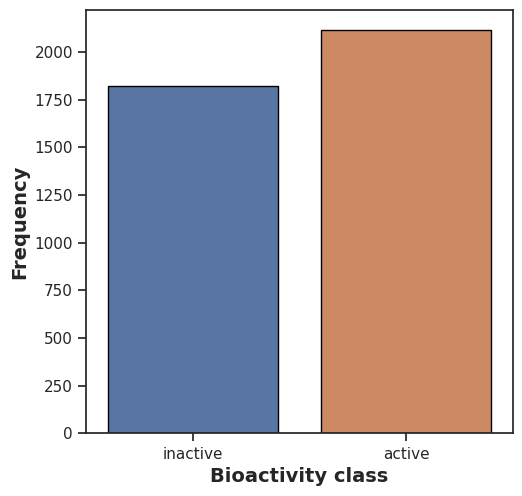

In [26]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

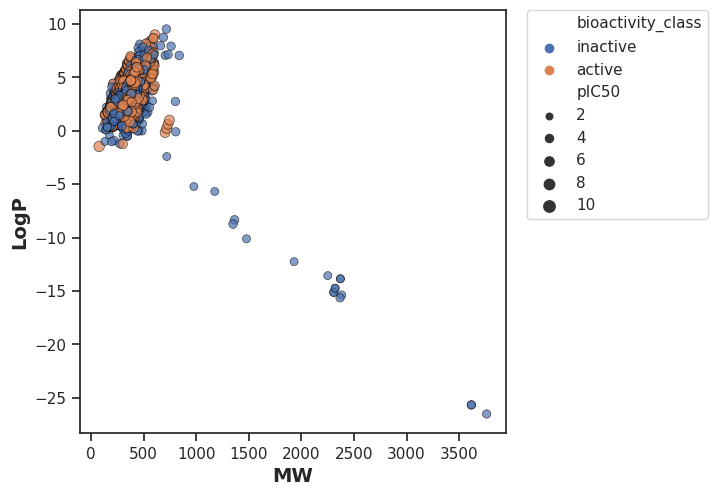

In [27]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### **Box plots**

#### **pIC50 value**

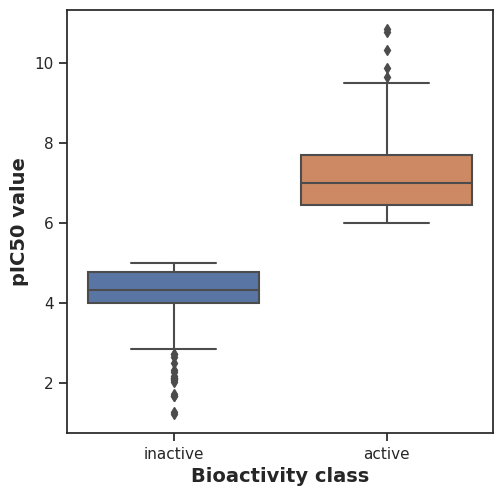

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [29]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [30]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,3849300.0,0.0,0.05,Different distribution (reject H0)


#### **MW**

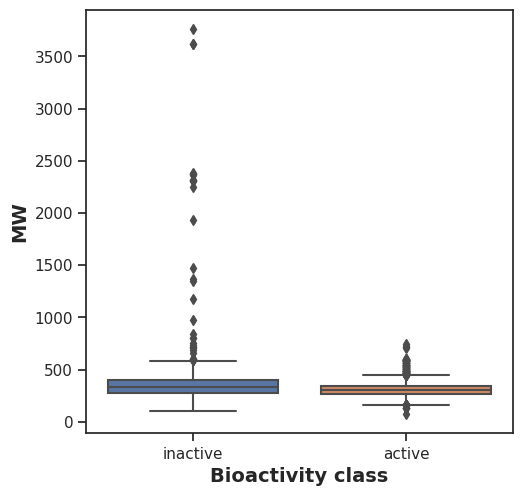

In [31]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [32]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,1585939.5,1.535895e-21,0.05,Different distribution (reject H0)


#### **LogP**

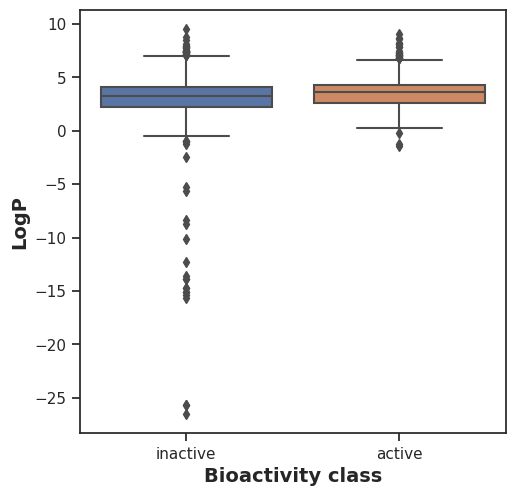

In [33]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [34]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,2205850.5,2.493760e-15,0.05,Different distribution (reject H0)


#### **NumHDonors**

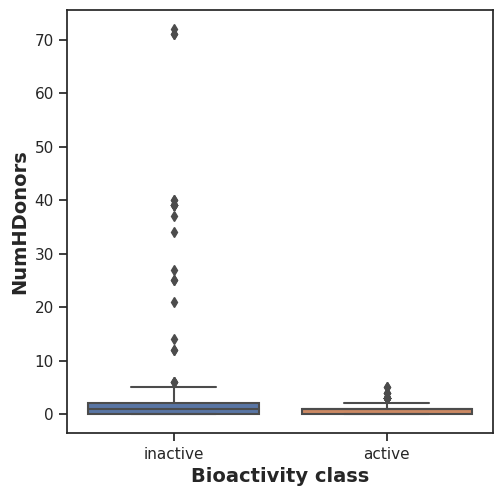

In [35]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [36]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,1504171.0,4.107000e-37,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

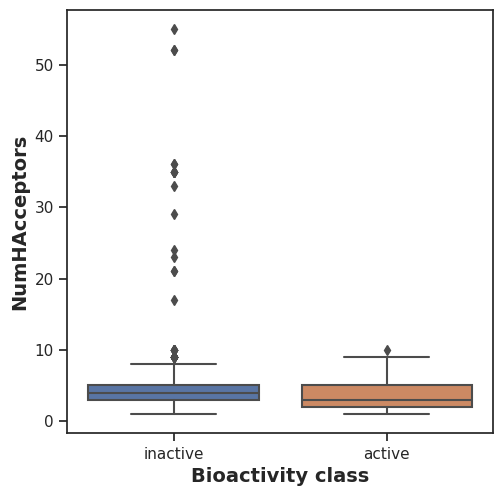

In [37]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [38]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,1572345.0,7.659859e-24,0.05,Different distribution (reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

All 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors) show ***statistically significant difference*** between **actives** and **inactives**.

## **Zip files**

In [39]:
! zip -r results.zip . -i *.csv *.pdf

Scanning files 
	zip warning: name not matched: drive
  adding: plot_ic50.pdf (deflated 37%)
  adding: plot_NumHAcceptors.pdf (deflated 37%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_MW_vs_LogP.pdf (deflated 2%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 37%)
  adding: bioactivity_preprocessed_data.csv (deflated 82%)
  adding: bioactivity_data_pIC50.csv (deflated 78%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
